In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import OnehotEncoder

In [372]:
df =  pd.read_csv('housing.csv')

In [373]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [374]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [375]:
df.shape

(20640, 10)

In [376]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [378]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [379]:
df['total_bedrooms'] = df.groupby('ocean_proximity')['total_bedrooms'].transform(
    lambda x: x.fillna(x.median())
)

In [380]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

**Outliers**

In [381]:
num_cols = df.select_dtypes(include=['int64','float64'])
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)

IQR = Q3 - Q1

lower_bounds = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (num_cols < lower_bounds) |  (num_cols > upper_bound)

In [382]:
num_cols = df.select_dtypes(include=['int64','float64'])
df_cleaned = df[~outliers.any(axis=1)]

In [383]:
df_cleaned = pd.get_dummies(df_cleaned)

In [384]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17609 entries, 2 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   17609 non-null  float64
 1   latitude                    17609 non-null  float64
 2   housing_median_age          17609 non-null  float64
 3   total_rooms                 17609 non-null  float64
 4   total_bedrooms              17609 non-null  float64
 5   population                  17609 non-null  float64
 6   households                  17609 non-null  float64
 7   median_income               17609 non-null  float64
 8   median_house_value          17609 non-null  float64
 9   ocean_proximity_<1H OCEAN   17609 non-null  bool   
 10  ocean_proximity_INLAND      17609 non-null  bool   
 11  ocean_proximity_ISLAND      17609 non-null  bool   
 12  ocean_proximity_NEAR BAY    17609 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  17609 no

In [385]:
bool_cats = df_cleaned.select_dtypes(include=bool).columns
df_cleaned[bool_cats] = df_cleaned[bool_cats].astype(int)

**Correlation Matrix**

In [386]:
df_cleaned['income_per_household'] = df_cleaned['median_income'] / df_cleaned['households']

In [387]:
df_cleaned['bedrooms_per_room'] = df_cleaned['total_bedrooms'] / df_cleaned['total_rooms']

In [388]:
corr_matrix = df_cleaned.corr(numeric_only=True)

In [389]:
target_corr = corr_matrix['median_house_value'].sort_values(ascending=True)
target_corr

ocean_proximity_INLAND       -0.510560
bedrooms_per_room            -0.186247
latitude                     -0.157176
longitude                    -0.043532
population                   -0.011466
ocean_proximity_ISLAND        0.034757
income_per_household          0.056954
total_bedrooms                0.091676
housing_median_age            0.097741
households                    0.120424
ocean_proximity_NEAR OCEAN    0.139639
ocean_proximity_NEAR BAY      0.159798
total_rooms                   0.192084
ocean_proximity_<1H OCEAN     0.290841
median_income                 0.629247
median_house_value            1.000000
Name: median_house_value, dtype: float64

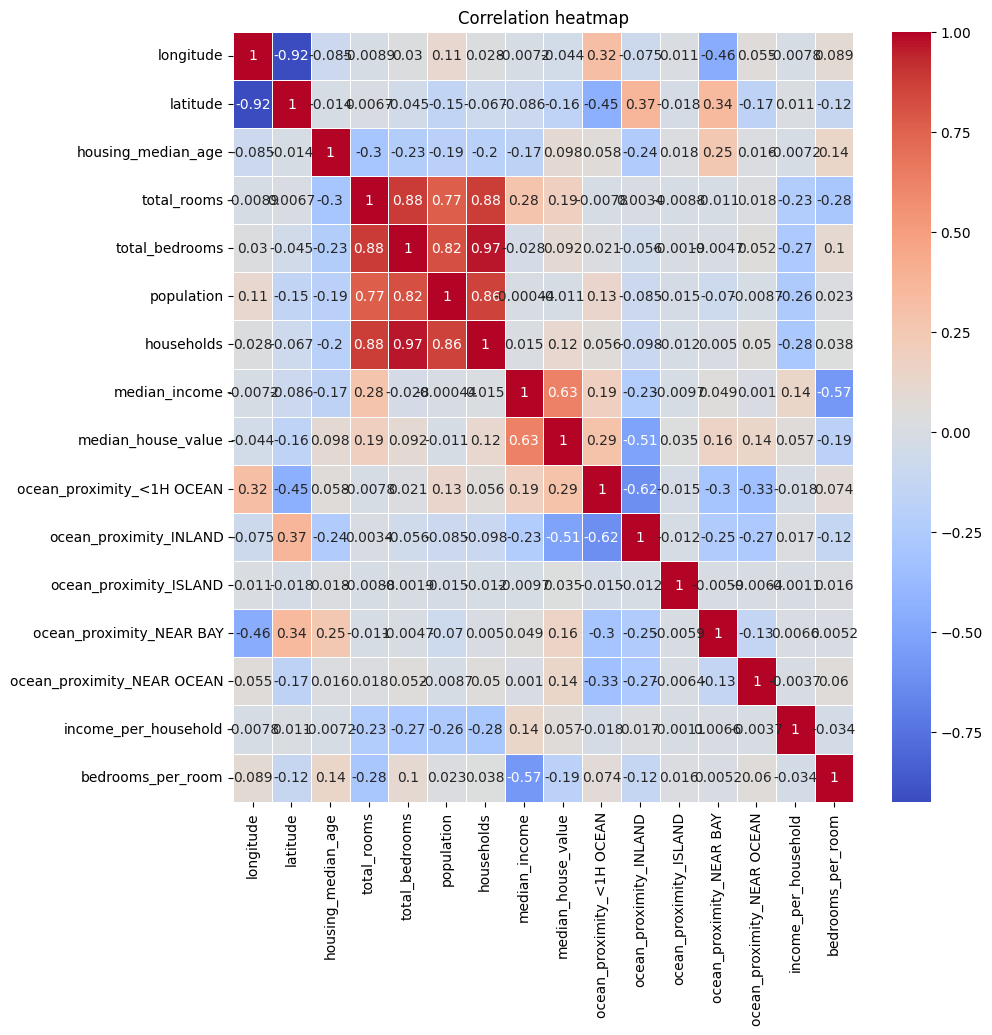

In [390]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cleaned.corr(numeric_only=True),annot=True,cmap="coolwarm",linewidths=0.5)
plt.title("Correlation heatmap")
plt.show()

**Training and Splitting of data for Testing**

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression,SelectKBest

**Selecting the Best Correllated ones**

In [392]:
x=df_cleaned.drop('median_house_value',axis=1)
y = df_cleaned['median_house_value']
target = 'median_house_value'
selector = SelectKBest(score_func=f_regression,k=8)
x_selected = selector.fit_transform(x,y)
selected_column = x.columns[selector.get_support()]
# selected_column

df_selected = df_cleaned[selected_column.to_list() + [target]]

x = df_selected.drop(columns=[target])
y=df_selected[target]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [393]:
from sklearn.metrics import mean_squared_error,r2_score

**LinearRegression**

In [394]:
model = LinearRegression()

In [395]:
model.fit(x_train,y_train)

LinearRegression()

In [396]:
prediction = model.predict(x_test)
x_train_pred = model.predict(x_train)

In [397]:
mse = mean_squared_error(y_test,prediction)
print(f'R2️⃣ score of linear train: {r2_score(y_train,x_train_pred)}')
print(f'R2️⃣ score of linear test: {r2_score(y_test,prediction)}')
print(f'mse = {mse:.2f}')

R2️⃣ score of linear train: 0.5561181198466698
R2️⃣ score of linear test: 0.5473200696465009
mse = 4141566167.64


**PolynomialRegression**

In [398]:
from sklearn.preprocessing import PolynomialFeatures

In [399]:
poly = PolynomialFeatures(degree=2,include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [400]:
model = LinearRegression()
model.fit(x_train_poly,y_train)
y_pred = model.predict(x_test_poly)
x_train_ = model.predict(x_train_poly)
mse_poly = mean_squared_error(y_test,y_pred)
print(f'R2️⃣ score of poly train : {r2_score(y_train,x_train_)}')
print(f'R2️⃣ score of poly test : {r2_score(y_test,y_pred)}')
print(f'mse = {mse_poly:.2f}')

R2️⃣ score of poly train : 0.5868355371071441
R2️⃣ score of poly test : 0.5828114636913727
mse = 3816855600.72


**SGD vs Batch Gradient Descent**

In [401]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [402]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [403]:
sgd = SGDRegressor(max_iter=1000,tol=1e-3,learning_rate='invscaling',eta0=0.01)

In [404]:
sgd.fit(x_train_scaled,y_train)
sgd_prediction = sgd.predict(x_test_scaled)
sgd_train_pred = sgd.predict(x_train_scaled)

In [405]:
mse = mean_squared_error(y_test,sgd_prediction)

In [406]:
print(f'R2️⃣ score of sgd train : {r2_score(y_train,sgd_train_pred)}')
print(f'R2️⃣ score of sgd test : {r2_score(y_test,sgd_prediction)}')
print(f'mse: {mse}')

R2️⃣ score of sgd train : 0.5541857569515904
R2️⃣ score of sgd test : 0.5467559237340311
mse: 4146727535.4574986


**Model 4: Regularization (Ridge and Lasso)**

In [407]:
from sklearn.linear_model import Ridge,Lasso

In [408]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled,y_train)
ridge_pred= ridge.predict(x_test_scaled)
ridge_train = ridge.predict(x_train_scaled)

In [409]:
print(f'R2️⃣ score of ridge train : {r2_score(y_train,ridge_train)}')
print(f'R2️⃣ score ridge test : {r2_score(y_test,ridge_pred)}')
mse = mean_squared_error(y_test,ridge_pred)
print(f'mse score : {mse}')

R2️⃣ score of ridge train : 0.5560903774354566
R2️⃣ score ridge test : 0.5473217453074994
mse score : 4141550837.025638


In [410]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lasso = Lasso(alpha=1.0)
lasso.fit(x_train_scaled,y_train)
lasso_pred = lasso.predict(x_test_scaled)
lasso_train = lasso.predict(x_train_scaled)
mse = mean_squared_error(y_test,lasso_pred)
print(f'R2️⃣ score of lasso train : {r2_score(y_train,lasso_train)}')
print(f'R2️⃣ score of lasso test : {r2_score(y_test,lasso_pred)}')
print(f'mse: {mse}')

R2️⃣ score of lasso train : 0.5558556773012245
R2️⃣ score of lasso test : 0.5473222697247158
mse: 4141546039.1354384


C:\Users\Pst John\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.590e+13, tolerance: 1.226e+10
  model = cd_fast.enet_coordinate_descent(
